<a href="https://colab.research.google.com/github/LatoyaHuiZheng/580DHM2/blob/main/Time_series_Forecast_of_AMZN(580D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
 pip install yfinance

In [57]:
import yfinance as yf
#Import the Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import datetime
plt.style.use("fivethirtyeight")

In [58]:
# Create Ticker variables
amzn = yf.Ticker("AMZN")
#Set the time range
amzn_hist = amzn.history(start=datetime.datetime(2015, 1, 1),end=datetime.datetime.today())
amzn_hist.head(20)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02 00:00:00-05:00,15.6290,15.7375,15.348000,15.4260,55664000,0.0,0.0
2015-01-05 00:00:00-05:00,15.3505,15.4190,15.042500,15.1095,55484000,0.0,0.0
2015-01-06 00:00:00-05:00,15.1120,15.1500,14.619000,14.7645,70380000,0.0,0.0
2015-01-07 00:00:00-05:00,14.8750,15.0640,14.766500,14.9210,52806000,0.0,0.0
2015-01-08 00:00:00-05:00,15.0160,15.1570,14.805500,15.0230,61768000,0.0,0.0
2015-01-09 00:00:00-05:00,15.0740,15.1435,14.834000,14.8465,51848000,0.0,0.0
2015-01-12 00:00:00-05:00,14.8780,14.9255,14.464000,14.5705,68428000,0.0,0.0
2015-01-13 00:00:00-05:00,14.8740,15.0750,14.661500,14.7370,82728000,0.0,0.0
2015-01-14 00:00:00-05:00,14.5965,14.7955,14.325000,14.6635,110774000,0.0,0.0


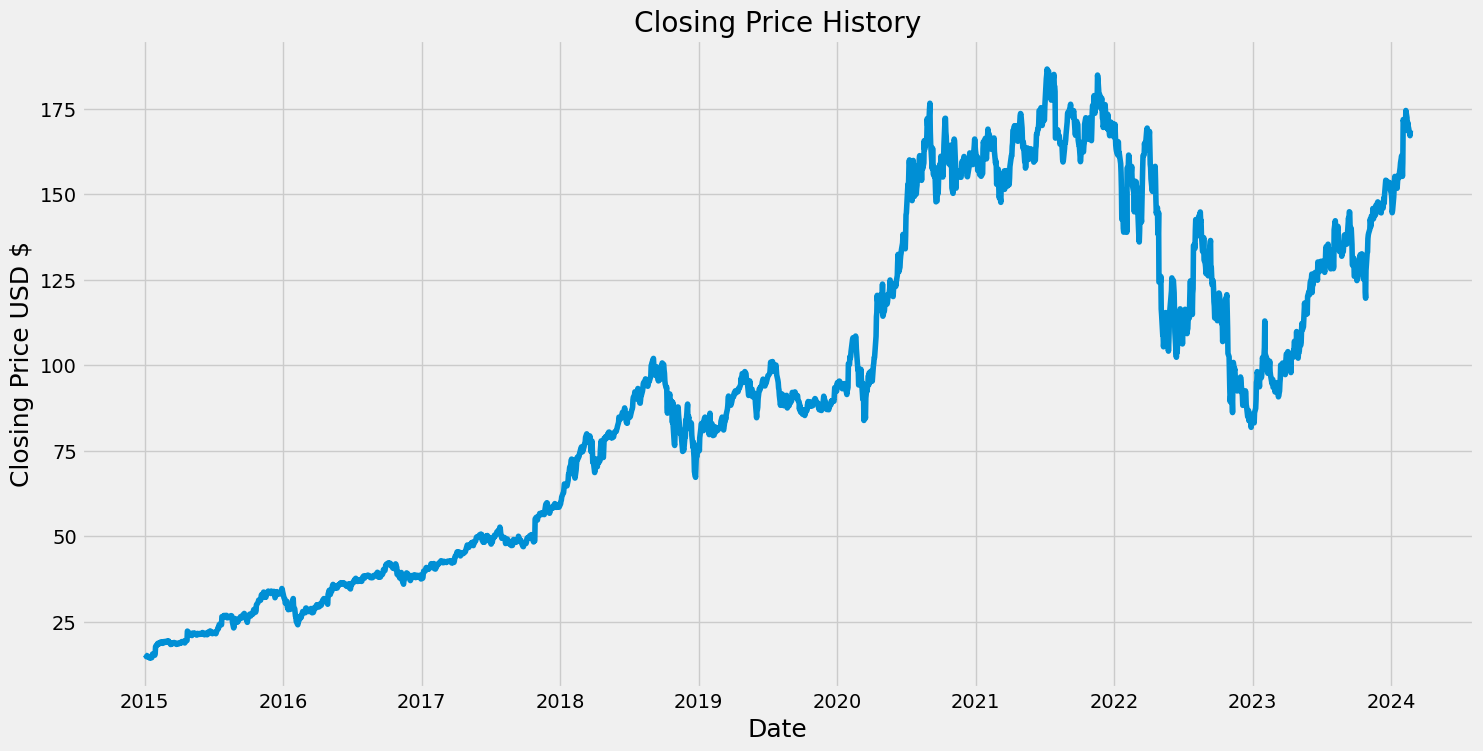

In [59]:
#Visualization of the Closing price
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(amzn_hist["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price USD $", fontsize=18)
plt.show()

In [60]:
#Create a new dataframe with only the Adj Close Column
data = amzn_hist.filter(["Close"])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) #This is use to train 80% of the dataset

training_data_len

1840

In [61]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data
#Scaling the data means you are actually standardizing your data

array([[0.00626223],
       [0.0044245 ],
       [0.00242128],
       ...,
       [0.90093947],
       [0.8868299 ],
       [0.89559757]])

In [62]:
#Create the training model for the dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train & y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00626223, 0.0044245 , 0.00242128, 0.00332998, 0.00392224,
       0.00289741, 0.00129484, 0.00226161, 0.00183483, 0.        ,
       0.00110032, 0.0007229 , 0.00299031, 0.00678481, 0.00738578,
       0.0065932 , 0.00574836, 0.00492385, 0.00720868, 0.01961991,
       0.0225057 , 0.02223861, 0.02258699, 0.02524053, 0.02535376,
       0.02427376, 0.02498214, 0.02560343, 0.02619278, 0.02754568,
       0.02568763, 0.02508957, 0.02672408, 0.02807697, 0.02705504,
       0.02660505, 0.02857342, 0.02840794, 0.02706084, 0.02865762,
       0.02835277, 0.02780407, 0.02928761, 0.02704052, 0.02659633,
       0.02396893, 0.02305732, 0.02534214, 0.02427957, 0.02508376,
       0.0246686 , 0.02560343, 0.02505183, 0.02657601, 0.02559473,
       0.0252986 , 0.02438989, 0.02334183, 0.02427376, 0.02544376])]
[0.024720854936266856]

[array([0.00626223, 0.0044245 , 0.00242128, 0.00332998, 0.00392224,
       0.00289741, 0.00129484, 0.00226161, 0.00183483, 0.        ,
       0.00110032, 0.0007229 , 0.0

In [63]:
#Now you'll notice it a 3 dimensional shape

import numpy as np

# 将列表对象转换为 numpy 数组
x_train = np.array(x_train)

# 使用 .reshape() 方法重新塑造数据
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(1780, 60, 1)

In [64]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))#50 means the no of input neurons
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))# Final output

In [65]:
#Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [66]:
import numpy as np

# 将列表转换为 numpy 数组
x_train = np.array(x_train)
y_train = np.array(y_train)
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


#Batch size the number of Batch per training, while epochs is the number of Iteration



Epoch 1/5
1780/1780 [==============================] - 80s 42ms/step - loss: 0.0015
Epoch 2/5
1780/1780 [==============================] - 59s 33ms/step - loss: 6.7914e-04
Epoch 3/5
1780/1780 [==============================] - 59s 33ms/step - loss: 5.4812e-04
Epoch 4/5
1780/1780 [==============================] - 59s 33ms/step - loss: 4.7299e-04
Epoch 5/5
1780/1780 [==============================] - 60s 34ms/step - loss: 3.8436e-04


In [67]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [68]:
#Convert the data to a numpy array
x_test = np.array(x_test)#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


In [69]:
#Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

15/15 [==============================] - 2s 26ms/step


In [70]:
#Evaluate the model: Getting the root square error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

0.4504775502323325

<ipython-input-71-9079f97f65c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


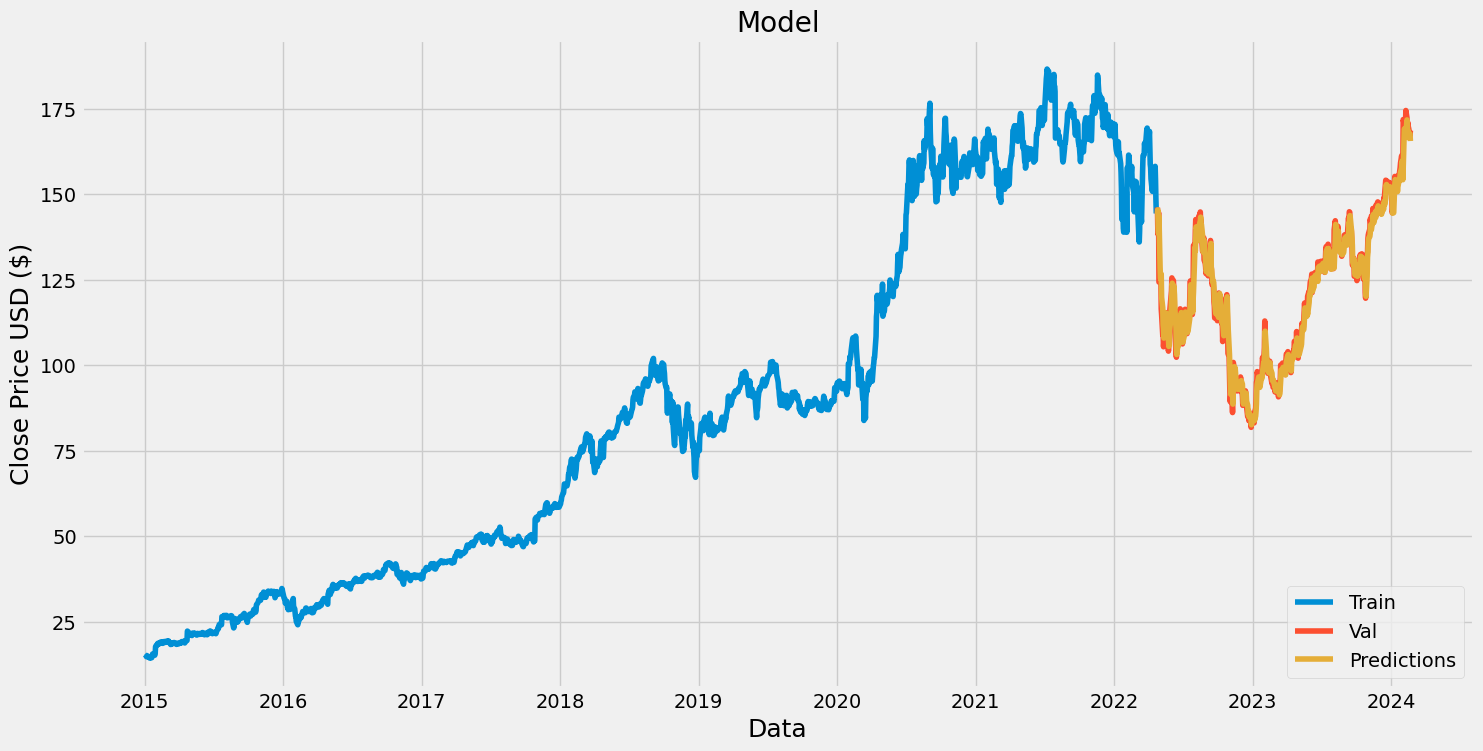

In [71]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Data", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

In [72]:
#Show the valid and predicted prices
valid
#This compares between the "Close" and "Predictions"

,Close,Predictions
Date,,
2022-04-25 00:00:00-04:00,146.074005,144.396286
2022-04-26 00:00:00-04:00,139.391006,145.404068
2022-04-27 00:00:00-04:00,138.167007,140.403824
2022-04-28 00:00:00-04:00,144.596497,138.526062
2022-04-29 00:00:00-04:00,124.281502,143.650558
...,...,...
2024-02-14 00:00:00-05:00,170.979996,166.617538
2024-02-15 00:00:00-05:00,169.800003,168.448380
2024-02-16 00:00:00-05:00,169.509995,167.870743
